In [57]:
# Imports
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [18]:
#path = 'us_etf_stocks_dataset\\'
path = 'E:\\Dataset\\'

train_stocks = ['aapl', 'msft', 'amzn', 'nvda', 'googl']
test_stocks = ['ge', 'ibm', 'mo', 'hpq', 'ko']

def read_stock_data(names):
    data = {}
    for stock in names:
        data[stock] = pd.read_csv(path + f'Stocks\\{stock}.us.txt')
    return data

train_stock_data = read_stock_data(train_stocks)
test_stock_data = read_stock_data(train_stocks)

In [35]:
def preprocess_data(name, timestep = 50, date = None):
    scaler = MinMaxScaler()

    data = pd.read_csv(path + f'Stocks\\{name}.us.txt')

    if date:
        start_date = data['Date'] >= date
        data = data[start_date]

    data = data['Open']
    data = np.array(data)
    data = data.reshape(-1, 1)
    scaled_data = scaler.fit_transform(data)

    X_train = []
    y_train = []
    for i in range(timestep, len(data)):
        X_train.append(scaled_data[i - timestep:i, 0])
        y_train.append(scaled_data[i, 0])

    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    print(X_train.shape)
    
    return X_train, y_train

In [41]:
def train_data(names, timestep = 50, date = None, epochs = 50, batch_size = 32):
    model = Sequential()

    model.add(LSTM(units=50, return_sequences=True, input_shape=(timestep, 1)))
    model.add(Dropout(0.2))

    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(units=50))
    model.add(Dropout(0.2))

    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    for name in names:
        X_train, y_train = preprocess_data(name, timestep = timestep, date = date)
        model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)
    
    return model

In [97]:
def predict_data(model, names, timestep = 50, date = None):
    for name in names:
        scaler = MinMaxScaler()

        data = pd.read_csv(path + f'Stocks\\{name}.us.txt')

        if date:
            start_date = data['Date'] >= date
            data = data[start_date]


        data = data['Open']
        data = np.array(data)
        data = data.reshape(-1, 1)
        scaled_data = scaler.fit_transform(data)

        X_test = []
        for i in range(timestep, len(scaled_data)):
            X_test.append(scaled_data[i - timestep:i, 0])
        
        X_test = np.array(X_test)
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

        prediction = model.predict(X_test)
        prediction = scaler.inverse_transform(prediction)

        print(f'MSE: {mean_squared_error(data[timestep:], prediction)}')
        print(f'R2: {r2_score(data[timestep:], prediction)}')

        name = name.upper()
        plt.plot(data[timestep:], color = 'black', label = f'Actual {name} Stock Price')
        plt.plot(prediction, color = 'green', label = f'Predicted {name} Stock Price')
        plt.title(f'{name} Stock Price Prediction')
        plt.xlabel('Time')
        plt.ylabel('Stock Price')
        plt.legend()
        plt.show()

In [ ]:
model = train_data(['aapl'], date = '2000-00-00', epochs = 25, batch_size = 32)

139/139 [==============================] - 3s 25ms/step
MSE: 6.902395203375217
R2: 0.9964478792020864


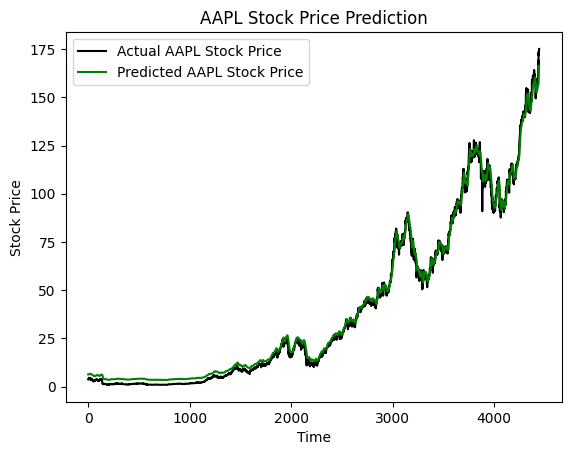

139/139 [==============================] - 3s 24ms/step
MSE: 1.570314112662005
R2: 0.9911661141996864


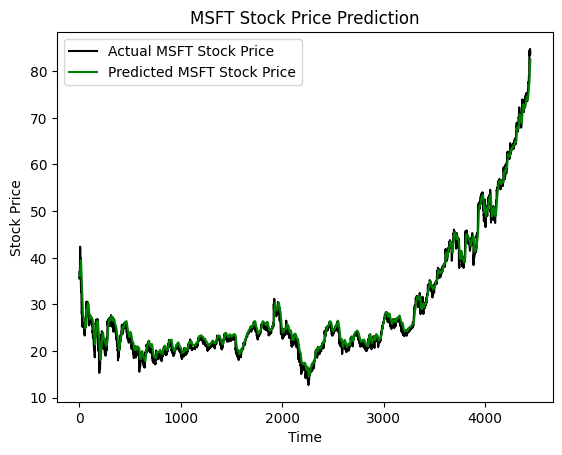

139/139 [==============================] - 3s 23ms/step
MSE: 270.7846733027436
R2: 0.995664609757276


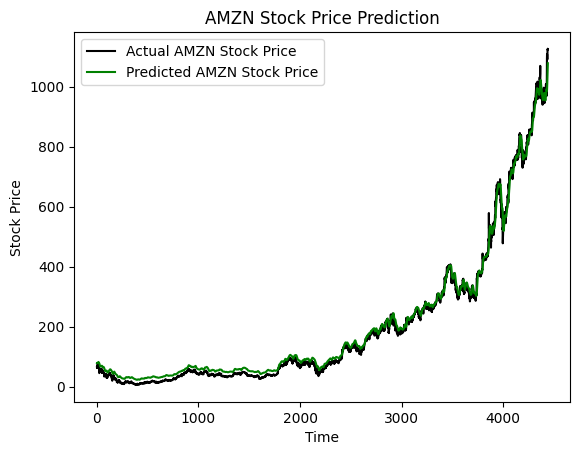

139/139 [==============================] - 3s 22ms/step
MSE: 10.833801180143107
R2: 0.9885885985713808


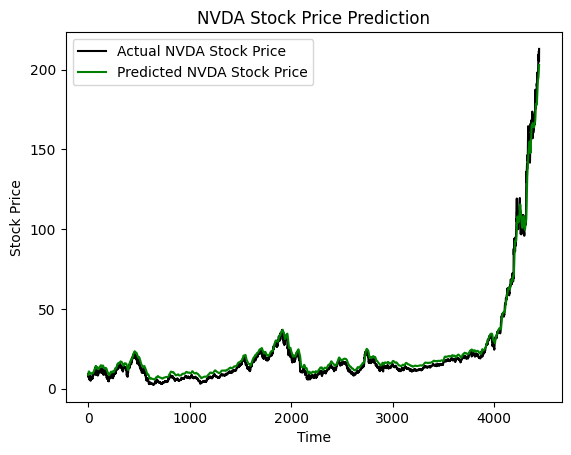

103/103 [==============================] - 2s 22ms/step
MSE: 251.7810195084198
R2: 0.9953754275891613


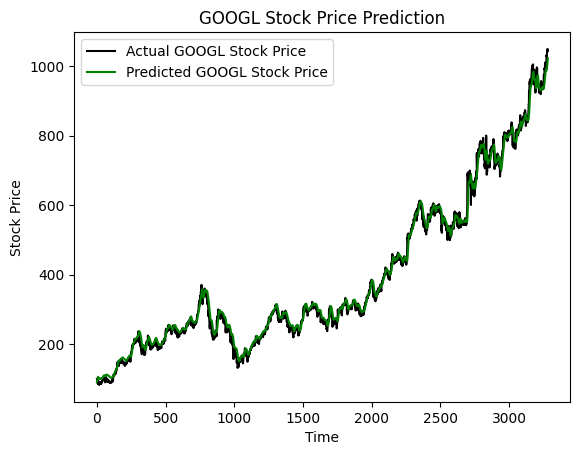

In [98]:
predict_data(model, train_stocks, date = '2000-00-00')